# Day 50

## Movie Rating and Recommendation

### Steps:
1. Import libraries
2. Import the Dataset
3. Data Analysis - DE, DM, DC, DV, EDA [OPTIONAL] Hyper Parameter Tuning
4. Feature Ingering - Encoding, Feature Scaling 
5. Split the data into two sets using the CSV
6. Model selection - KNN
7. Training the Model
8. Test the Model
9. Performance - Confusion Metric

### Importing the Libraries

In [5]:
import pandas as pd
import numpy as np
import json
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold

import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

Credits: https://drive.google.com/file/d/1nWdt8_Hh-M35N4GwRixPmb3AsHNQVZKQ/view?usp=sharing

Movies: https://drive.google.com/file/d/1HxZXAkPajH40pChWvpAseOi71VW0k3wS/view?usp=sharing

In [6]:
movies = pd.read_csv("./movies.csv")
credit = pd.read_csv("./credits.csv")

### Data Analysis

In [7]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [8]:
credit.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [9]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [11]:
movies.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [12]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

### For column Genres

In [13]:
# movies.genres[0]

In [14]:
# re.findall('name',movies.genres[0])

In [15]:
# a = eval(movies.genres[0])

In [16]:
# for i in range(len(a)):
    # print(a[i]['name'])

In [17]:
# asd = [eval(movies.genres[0])[i]['name'] for i in range(len(eval(movies.genres[0])))]
# asd

In [18]:
# Taking above codes and putting it for whole code 
# zip is use ti iterate (repeat) the two list 

for i,k in zip (movies.genres,range(len(movies.genres))):
    movies.genres[k] = [eval(i) [j] ['name'] for j in range(len(eval(i)))]

In [19]:
movies.genres

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

In [20]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


### For column Keywords

In [21]:
# movies.keywords[0]

In [22]:
# b = eval(movies.keywords[0])
# b

In [23]:
# for i in range(len(b)):
#     print(b[i]['name'])

In [24]:
for i,k in zip (movies.keywords,range(len(movies.keywords))):
    movies.keywords[k] = [eval(i) [j] ['name'] for j in range(len(eval(i)))]

### For column Production_companies

In [25]:
# c = eval(movies.production_companies[0])
# c

In [26]:
# for i in range(len(c)):
#     print(c[i]['name'])

In [27]:
for i,k in zip (movies.production_companies,range(len(movies.production_companies))):
    movies.production_companies[k] = [eval(i) [j] ['name'] for j in range(len(eval(i)))]

In [28]:
movies.production_companies

0       [Ingenious Film Partners, Twentieth Century Fo...
1       [Walt Disney Pictures, Jerry Bruckheimer Films...
2                        [Columbia Pictures, Danjaq, B24]
3       [Legendary Pictures, Warner Bros., DC Entertai...
4                                  [Walt Disney Pictures]
                              ...                        
4798                                  [Columbia Pictures]
4799                                                   []
4800    [Front Street Pictures, Muse Entertainment Ent...
4801                                                   []
4802         [rusty bear entertainment, lucky crow films]
Name: production_companies, Length: 4803, dtype: object

### For column Production_countries

In [29]:
# d = eval(movies.production_countries[0])
# d

In [30]:
# for i in range(len(d)):
#     print(d[i]['name'])

In [31]:
for i,k in zip(movies.production_countries,range(len(movies.production_countries))):
        movies.production_countries[k] = [eval(i) [j] ['name'] for j in range(len(eval(i)))]

In [32]:
movies.production_countries

0       [United States of America, United Kingdom]
1                       [United States of America]
2       [United Kingdom, United States of America]
3                       [United States of America]
4                       [United States of America]
                           ...                    
4798            [Mexico, United States of America]
4799                                            []
4800                    [United States of America]
4801             [United States of America, China]
4802                    [United States of America]
Name: production_countries, Length: 4803, dtype: object

### For column spoken_languages

In [33]:
# e = eval(movies.spoken_languages[0])
# e

In [34]:
# for i in range(len(e)):
#     print(e[i]['name'])

In [35]:
for i, k in zip(movies.spoken_languages,range(len(movies.spoken_languages))):
    movies.spoken_languages[k] = [eval(i)[j]['name'] for j in range(len(eval(i)))]

In [36]:
movies.spoken_languages

0                                    [English, Español]
1                                             [English]
2       [Français, English, Español, Italiano, Deutsch]
3                                             [English]
4                                             [English]
                             ...                       
4798                                          [Español]
4799                                                 []
4800                                          [English]
4801                                          [English]
4802                                          [English]
Name: spoken_languages, Length: 4803, dtype: object

In [37]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[English, Español]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[English],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [38]:
movies.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [39]:
movies.shape

(4803, 20)

In [40]:
movies.drop('homepage',axis=1, inplace =True)

In [41]:
movies.drop('tagline',axis=1, inplace =True)

In [42]:
movies.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [43]:
movies[movies.runtime.isna()]

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
2656,15000000,[Drama],370980,"[pope, biography]",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,[Taodue Film],[Italy],2015-12-03,0,NaN,[Español],Released,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,[Documentary],459488,"[music, actors, legendary perfomer, classic ho...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,[Eyeline Entertainment],[United Kingdom],2015-12-12,0,NaN,[],Released,"To Be Frank, Sinatra at 100",0.0,0


In [44]:
# As we can't fix the overview column where we have NaN values and luckely we have runtime and overvive NaN values in same rows so
# we can use the dropna function here

movies.dropna(inplace = True )

In [45]:
movies.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [46]:
movies.shape

(4799, 18)

In [47]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   original_title        4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  release_date          4799 non-null   object 
 11  revenue               4799 non-null   int64  
 12  runtime               4799 non-null   float64
 13  spoken_languages      4799 non-null   object 
 14  status                4799 non-null   object 
 15  title                

In [48]:
# Separating the release_date into --> release_day, release_month, release_year
movies.release_date

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4798    1992-09-04
4799    2011-12-26
4800    2013-10-13
4801    2012-05-03
4802    2005-08-05
Name: release_date, Length: 4799, dtype: object

In [49]:
movies ['Year'] = pd.DatetimeIndex(movies.release_date).year 
movies ['Month'] = pd.DatetimeIndex(movies.release_date).month
movies ['Day'] = pd.DatetimeIndex(movies.release_date).day

In [50]:
movies.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,Year,Month,Day
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800,2009,12,10


In [51]:
movies.drop('release_date', axis =1, inplace =True)

In [52]:
movies.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,Year,Month,Day
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2787965087,162.0,"[English, Español]",Released,Avatar,7.2,11800,2009,12,10


In [53]:
credit.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [54]:
credit.isna().sum()

movie_id    0
title       0
cast        0
crew        0
dtype: int64

In [55]:
movies.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'spoken_languages',
       'status', 'title', 'vote_average', 'vote_count', 'Year', 'Month',
       'Day'],
      dtype='object')

In [56]:
credit.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [57]:
# Joing the two datase using Id and Movies_id columns

movies = pd.merge(movies, credit, left_on='id', right_on='movie_id')

In [58]:
movies.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,title_x,vote_average,vote_count,Year,Month,Day,movie_id,title_y,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,Avatar,7.2,11800,2009,12,10,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],...,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,19,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [59]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4798
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   original_title        4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  revenue               4799 non-null   int64  
 11  runtime               4799 non-null   float64
 12  spoken_languages      4799 non-null   object 
 13  status                4799 non-null   object 
 14  title_x               4799 non-null   object 
 15  vote_average         

In [60]:
movies.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title_x                 0
vote_average            0
vote_count              0
Year                    0
Month                   0
Day                     0
movie_id                0
title_y                 0
cast                    0
crew                    0
dtype: int64

In [61]:
movies.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,title_x,vote_average,vote_count,Year,Month,Day,movie_id,title_y,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,Avatar,7.2,11800,2009,12,10,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


### Data cleaning of cast column

In [62]:
movies.cast[0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [63]:
type((movies.cast[0]))

str

In [64]:
e = eval(movies.cast[0])
e

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [65]:
for i in range(len(e)):
    print(e[i]['name'])

Sam Worthington
Zoe Saldana
Sigourney Weaver
Stephen Lang
Michelle Rodriguez
Giovanni Ribisi
Joel David Moore
CCH Pounder
Wes Studi
Laz Alonso
Dileep Rao
Matt Gerald
Sean Anthony Moran
Jason Whyte
Scott Lawrence
Kelly Kilgour
James Patrick Pitt
Sean Patrick Murphy
Peter Dillon
Kevin Dorman
Kelson Henderson
David Van Horn
Jacob Tomuri
Michael Blain-Rozgay
Jon Curry
Luke Hawker
Woody Schultz
Peter Mensah
Sonia Yee
Jahnel Curfman
Ilram Choi
Kyla Warren
Lisa Roumain
Debra Wilson
Chris Mala
Taylor Kibby
Jodie Landau
Julie Lamm
Cullen B. Madden
Joseph Brady Madden
Frankie Torres
Austin Wilson
Sara Wilson
Tamica Washington-Miller
Lucy Briant
Nathan Meister
Gerry Blair
Matthew Chamberlain
Paul Yates
Wray Wilson
James Gaylyn
Melvin Leno Clark III
Carvon Futrell
Brandon Jelkes
Micah Moch
Hanniyah Muhammad
Christopher Nolen
Christa Oliver
April Marie Thomas
Bravita A. Threatt
Colin Bleasdale
Mike Bodnar
Matt Clayton
Nicole Dionne
Jamie Harrison
Allan Henry
Anthony Ingruber
Ashley Jeffery
Dean Kno

>>- If we are using multiple for loop while data cleaning it will take lot of time as our dataset is big so to get output in less runtime use **numba** Library it will help us a lot

In [66]:
for i,k in zip(movies.cast,range(len(movies.cast))):
    movies.cast[k] = [eval(i)[j]['name'] for j in range(len(eval(i)))]

In [67]:
movies.cast

0       [Sam Worthington, Zoe Saldana, Sigourney Weave...
1       [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2       [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3       [Christian Bale, Michael Caine, Gary Oldman, A...
4       [Taylor Kitsch, Lynn Collins, Samantha Morton,...
                              ...                        
4794    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4795    [Edward Burns, Kerry Bishé, Marsha Dietlein, C...
4796    [Eric Mabius, Kristin Booth, Crystal Lowe, Geo...
4797    [Daniel Henney, Eliza Coupe, Bill Paxton, Alan...
4798    [Drew Barrymore, Brian Herzlinger, Corey Feldm...
Name: cast, Length: 4799, dtype: object

### Data cleaning of crew column

In [68]:
movies.crew[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [69]:
# f = eval(movies.crew[0])
# f

In [70]:
# for i in range(len(f)):
#     print(f[i]['department'])

In [71]:
movies.department = []
for i,k in zip(movies.crew,range(len(movies.crew))):
    a = [eval(i)[j]['department'] for j in range(len(eval(i)))]   
    movies.department.append(a)
movies.department

[['Editing',
  'Art',
  'Sound',
  'Sound',
  'Production',
  'Sound',
  'Directing',
  'Writing',
  'Editing',
  'Production',
  'Writing',
  'Art',
  'Visual Effects',
  'Production',
  'Art',
  'Sound',
  'Sound',
  'Sound',
  'Sound',
  'Costume & Make-Up',
  'Production',
  'Art',
  'Art',
  'Art',
  'Art',
  'Production',
  'Costume & Make-Up',
  'Camera',
  'Art',
  'Crew',
  'Costume & Make-Up',
  'Costume & Make-Up',
  'Camera',
  'Art',
  'Visual Effects',
  'Crew',
  'Editing',
  'Art',
  'Camera',
  'Crew',
  'Visual Effects',
  'Crew',
  'Art',
  'Art',
  'Art',
  'Crew',
  'Crew',
  'Visual Effects',
  'Art',
  'Art',
  'Production',
  'Art',
  'Costume & Make-Up',
  'Camera',
  'Costume & Make-Up',
  'Visual Effects',
  'Visual Effects',
  'Crew',
  'Visual Effects',
  'Costume & Make-Up',
  'Costume & Make-Up',
  'Visual Effects',
  'Art',
  'Costume & Make-Up',
  'Costume & Make-Up',
  'Costume & Make-Up',
  'Art',
  'Art',
  'Editing',
  'Art',
  'Crew',
  'Crew',
  '

In [72]:
movies.name = []
for i,k in zip(movies.crew,range(len(movies.crew))):
    b = [eval(i)[j]['name'] for j in range(len(eval(i))) if eval(i)[j] ['job'] == 'Director']   
    movies.name.append(b)
movies.name

[['James Cameron'],
 ['Gore Verbinski'],
 ['Sam Mendes'],
 ['Christopher Nolan'],
 ['Andrew Stanton'],
 ['Sam Raimi'],
 ['Byron Howard', 'Nathan Greno'],
 ['Joss Whedon'],
 ['David Yates'],
 ['Zack Snyder'],
 ['Bryan Singer'],
 ['Marc Forster'],
 ['Gore Verbinski'],
 ['Gore Verbinski'],
 ['Zack Snyder'],
 ['Andrew Adamson'],
 ['Joss Whedon'],
 ['Rob Marshall'],
 ['Barry Sonnenfeld'],
 ['Peter Jackson'],
 ['Marc Webb'],
 ['Ridley Scott'],
 ['Peter Jackson'],
 ['Chris Weitz'],
 ['Peter Jackson'],
 ['James Cameron'],
 ['Anthony Russo', 'Joe Russo'],
 ['Peter Berg'],
 ['Colin Trevorrow'],
 ['Sam Mendes'],
 ['Sam Raimi'],
 ['Shane Black'],
 ['Tim Burton'],
 ['Brett Ratner'],
 ['Dan Scanlon'],
 ['Michael Bay'],
 ['Michael Bay'],
 ['Sam Raimi'],
 ['Marc Webb'],
 ['Joseph Kosinski'],
 ['John Lasseter', 'Brad Lewis'],
 ['Martin Campbell'],
 ['Lee Unkrich'],
 ['McG'],
 ['James Wan'],
 ['Marc Forster'],
 ['Bryan Singer'],
 ['J.J. Abrams'],
 ['Bryan Singer'],
 ['Baz Luhrmann'],
 ['Mike Newell'],
 

In [73]:
for i,k in zip(movies.crew,range(len(movies.crew))):
    movies.crew[k] = [eval(i)[j]['name'] for j in range(len(eval(i)))]

In [74]:
# Adding column back to dataframe
movies['Director'] = movies.name
movies['Department'] = movies.department

In [75]:
movies.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_count,Year,Month,Day,movie_id,title_y,cast,crew,Director,Department
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,11800,2009,12,10,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",[James Cameron],"[Editing, Art, Sound, Sound, Production, Sound..."


In [76]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4799 entries, 0 to 4798
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4799 non-null   int64  
 1   genres                4799 non-null   object 
 2   id                    4799 non-null   int64  
 3   keywords              4799 non-null   object 
 4   original_language     4799 non-null   object 
 5   original_title        4799 non-null   object 
 6   overview              4799 non-null   object 
 7   popularity            4799 non-null   float64
 8   production_companies  4799 non-null   object 
 9   production_countries  4799 non-null   object 
 10  revenue               4799 non-null   int64  
 11  runtime               4799 non-null   float64
 12  spoken_languages      4799 non-null   object 
 13  status                4799 non-null   object 
 14  title_x               4799 non-null   object 
 15  vote_average         

In [77]:
movies.isna().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
title_x                 0
vote_average            0
vote_count              0
Year                    0
Month                   0
Day                     0
movie_id                0
title_y                 0
cast                    0
crew                    0
Director                0
Department              0
dtype: int64

In [78]:
movies.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,vote_count,Year,Month,Day,movie_id,title_y,cast,crew,Director,Department
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",...,11800,2009,12,10,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",[James Cameron],"[Editing, Art, Sound, Sound, Production, Sound..."


In [79]:
## Exporting the dataset
movies.to_csv("movies_ratings.csv")

[budget, genres, keywords, popularity, revenue, runtime, status, title_x, vote_average, vote_count, Year, Month, Day, cast, Director]

In [108]:
movie = movies.get(['budget', 'genres', 'popularity', 'revenue', 'runtime', 
            'status', 'title_x', 'vote_average', 'vote_count', 'Year', 'Month', 'Day', 'cast', 'Director'])

In [109]:
movie.columns

Index(['budget', 'genres', 'popularity', 'revenue', 'runtime', 'status',
       'title_x', 'vote_average', 'vote_count', 'Year', 'Month', 'Day', 'cast',
       'Director'],
      dtype='object')

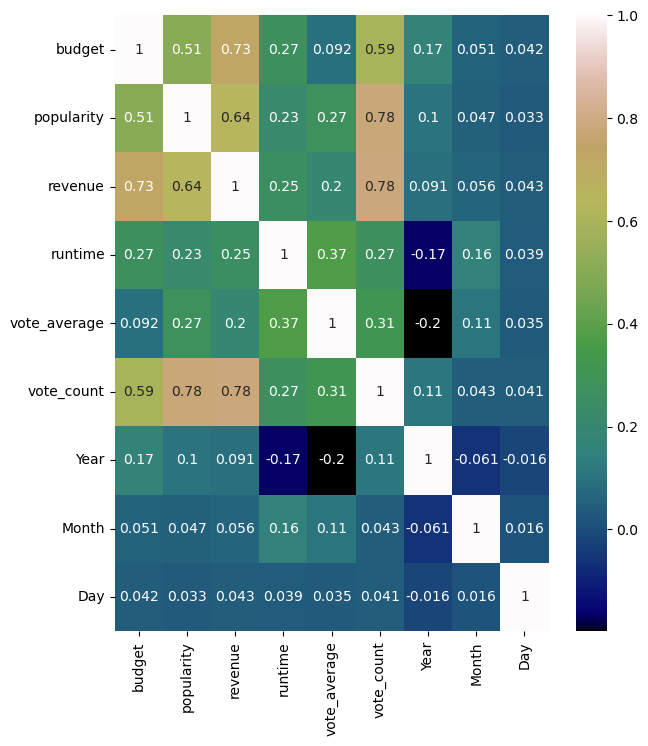

In [110]:
plt.figure(figsize=(7,8));
sns.heatmap(movies.corr(), annot = True, cmap = 'gist_earth');

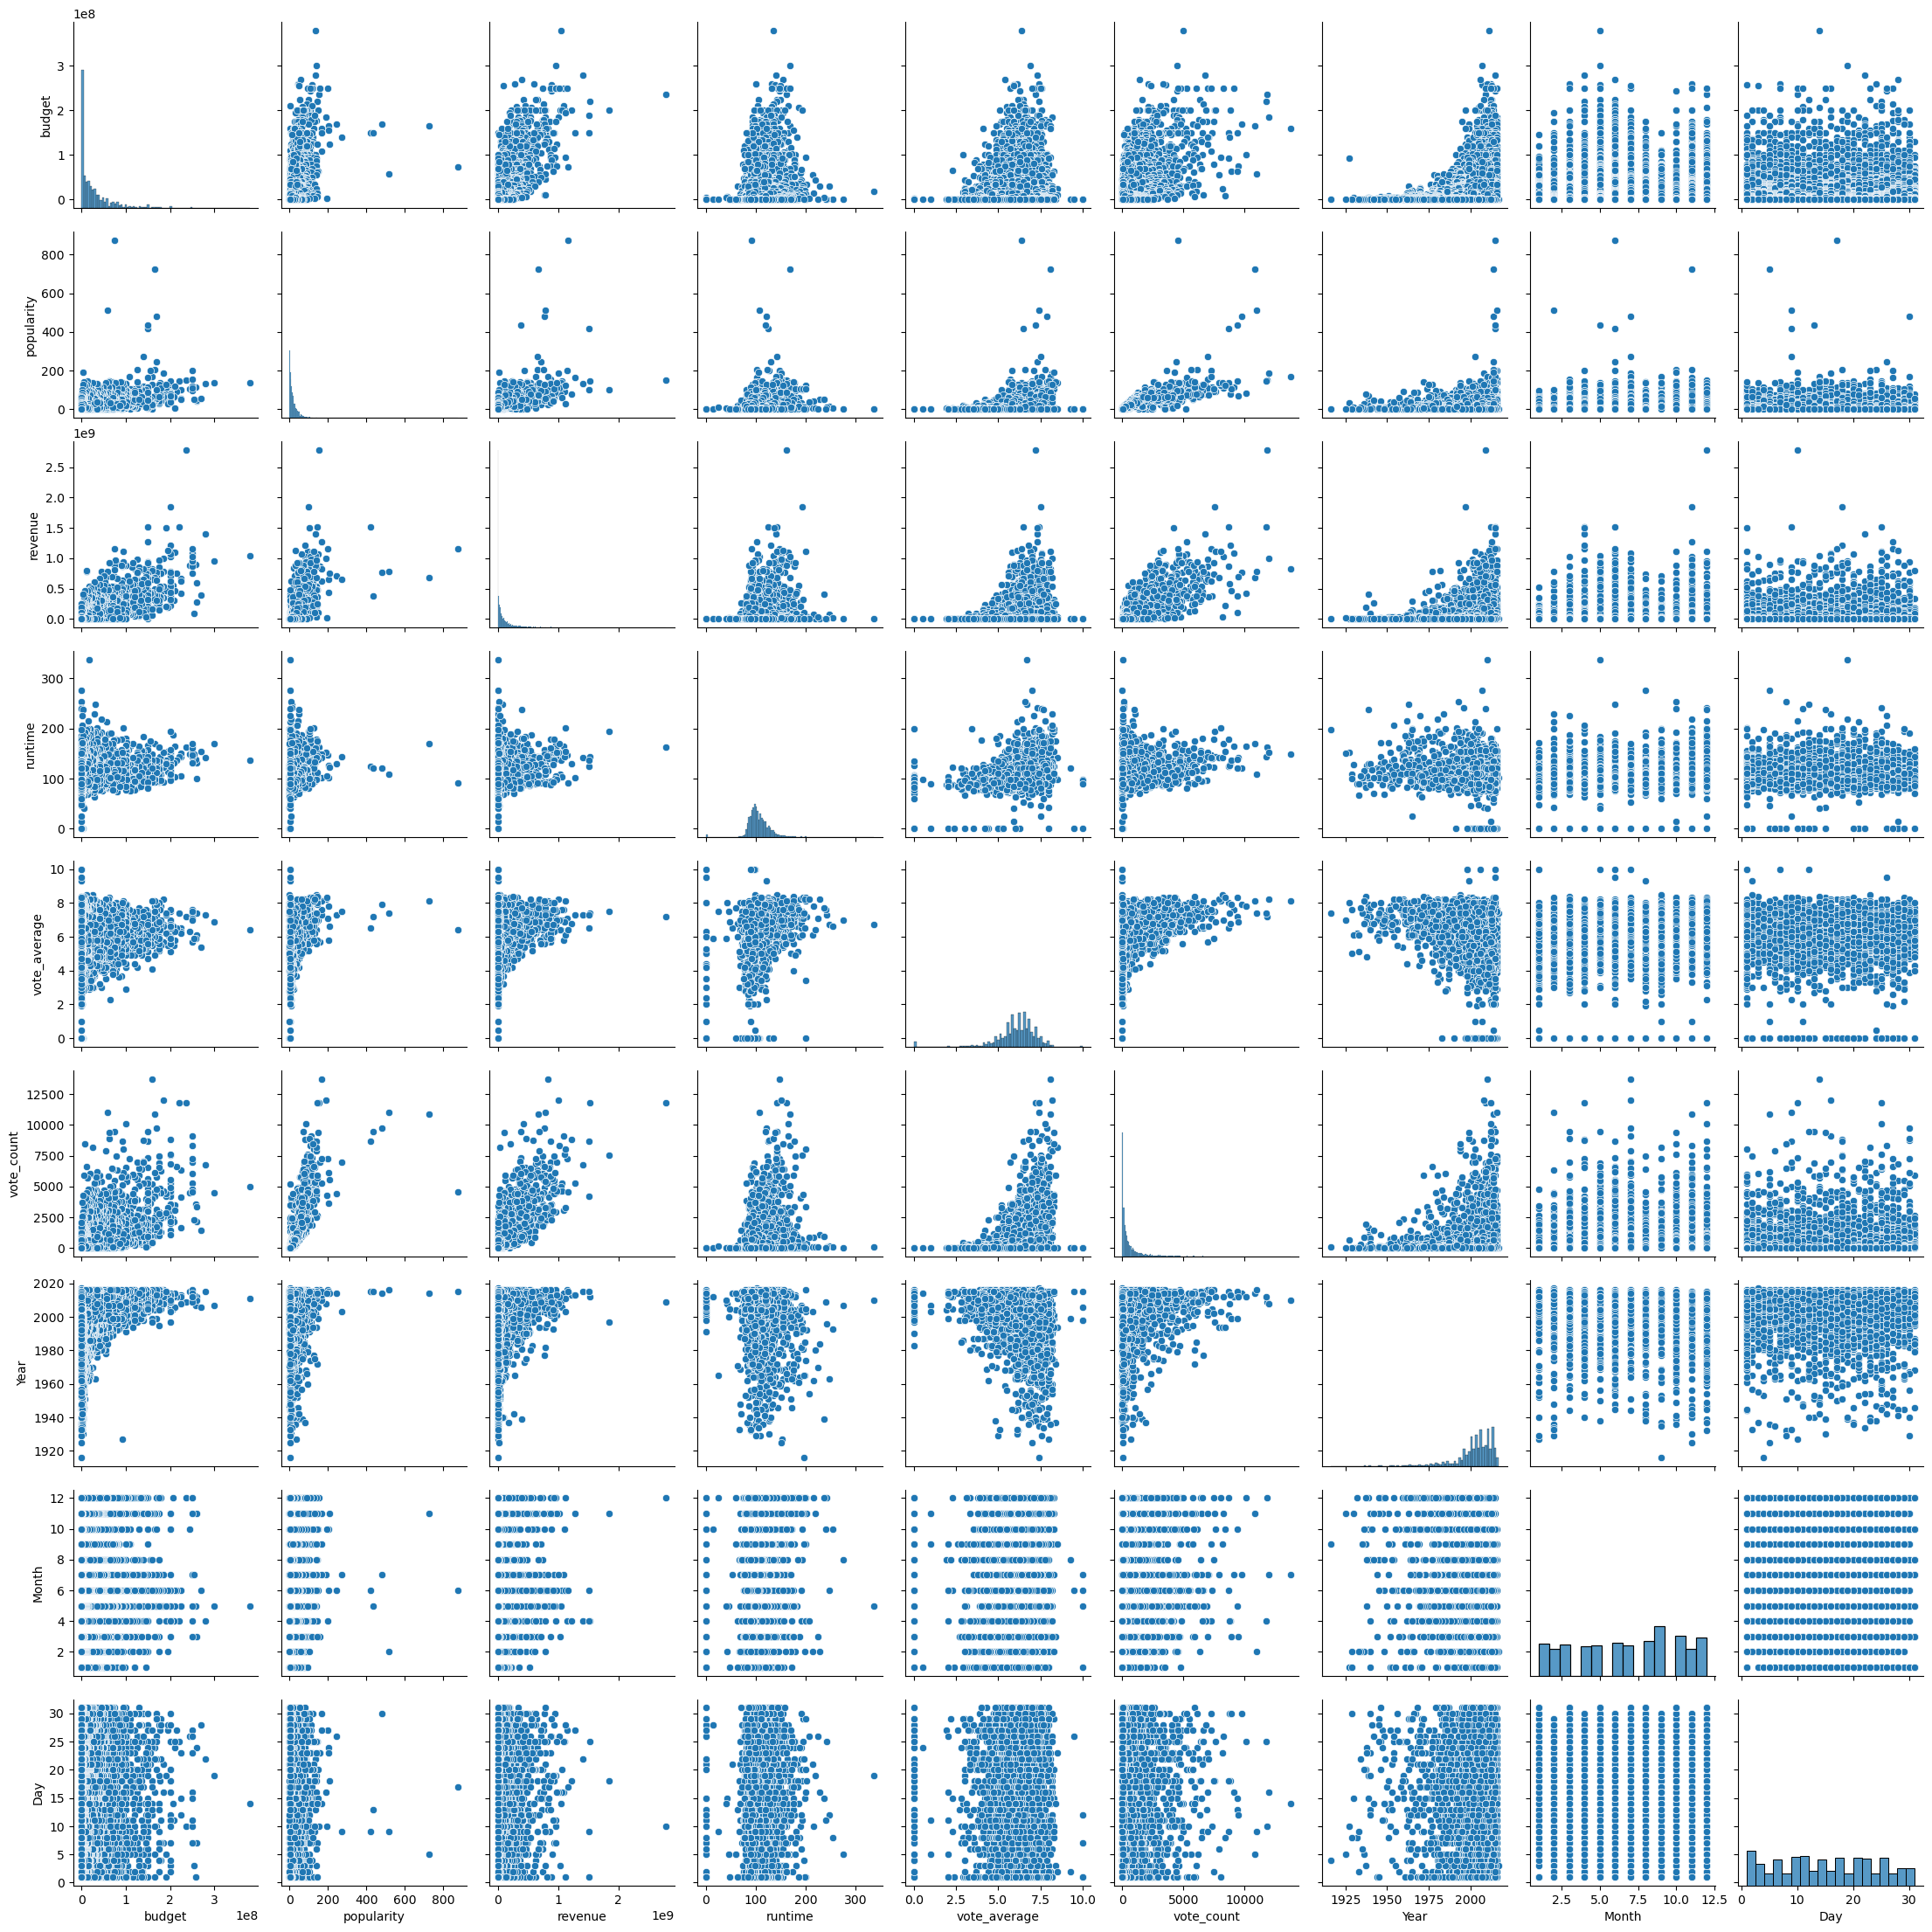

In [111]:
sns.pairplot(movie);

In [112]:
X = movie.drop('vote_average',axis =1)
y = movie.vote_average

In [113]:
X

,budget,genres,popularity,revenue,runtime,status,title_x,vote_count,Year,Month,Day,cast,Director
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,2787965087,162.0,Released,Avatar,11800,2009,12,10,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,300000000,"[Adventure, Fantasy, Action]",139.082615,961000000,169.0,Released,Pirates of the Caribbean: At World's End,4500,2007,5,19,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,245000000,"[Action, Adventure, Crime]",107.376788,880674609,148.0,Released,Spectre,4466,2015,10,26,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,250000000,"[Action, Crime, Drama, Thriller]",112.312950,1084939099,165.0,Released,The Dark Knight Rises,9106,2012,7,16,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,260000000,"[Action, Adventure, Science Fiction]",43.926995,284139100,132.0,Released,John Carter,2124,2012,3,7,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4794,220000,"[Action, Crime, Thriller]",14.269792,2040920,81.0,Released,El Mariachi,238,1992,9,4,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",[Robert Rodriguez]
4795,9000,"[Comedy, Romance]",0.642552,0,85.0,Released,Newlyweds,5,2011,12,26,"[Edward Burns, Kerry Bishé, Marsha Dietlein, C...",[Edward Burns]
4796,0,"[Comedy, Drama, Romance, TV Movie]",1.444476,0,120.0,Released,"Signed, Sealed, Delivered",6,2013,10,13,"[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",[Scott Smith]
4797,0,[],0.857008,0,98.0,Released,Shanghai Calling,7,2012,5,3,"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",[Daniel Hsia]


In [114]:
y

0       7.2
1       6.9
2       6.3
3       7.6
4       6.1
       ... 
4794    6.6
4795    5.9
4796    7.0
4797    5.7
4798    6.3
Name: vote_average, Length: 4799, dtype: float64

In [115]:
X.genres.value_counts()

[Drama]                                         369
[Comedy]                                        282
[Drama, Romance]                                164
[Comedy, Romance]                               144
[Comedy, Drama]                                 142
                                               ... 
[Adventure, Action, Comedy, Romance]              1
[Action, Fantasy, Science Fiction, Thriller]      1
[Science Fiction, Comedy, Adventure]              1
[Drama, Thriller, Horror]                         1
[Comedy, Drama, Romance, TV Movie]                1
Name: genres, Length: 1175, dtype: int64

In [116]:
X.cast.value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      